In [1]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Задача 1. Пронгозирование количества пассжиров гражданских авиалиний

In [2]:
data = pd.read_csv("air.csv")
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [6]:
x_all=data["#Passengers"].values
x_all=x_all/max(x_all)
x_all

array([0.18006431, 0.18971061, 0.21221865, 0.2073955 , 0.19453376,
       0.2170418 , 0.23794212, 0.23794212, 0.21864952, 0.19131833,
       0.16720257, 0.18971061, 0.18488746, 0.20257235, 0.2266881 ,
       0.2170418 , 0.20096463, 0.23954984, 0.2733119 , 0.2733119 ,
       0.25401929, 0.21382637, 0.18327974, 0.22508039, 0.23311897,
       0.24115756, 0.28617363, 0.26205788, 0.27652733, 0.28617363,
       0.31993569, 0.31993569, 0.29581994, 0.26045016, 0.23472669,
       0.26688103, 0.27491961, 0.28938907, 0.31028939, 0.29099678,
       0.29421222, 0.35048232, 0.36977492, 0.38906752, 0.33601286,
       0.30707395, 0.27652733, 0.31189711, 0.31511254, 0.31511254,
       0.37942122, 0.3778135 , 0.3681672 , 0.39067524, 0.4244373 ,
       0.43729904, 0.38102894, 0.3392283 , 0.28938907, 0.32315113,
       0.32797428, 0.3022508 , 0.3778135 , 0.36495177, 0.37620579,
       0.4244373 , 0.48553055, 0.47106109, 0.41639871, 0.3681672 ,
       0.32636656, 0.3681672 , 0.38906752, 0.37459807, 0.42926

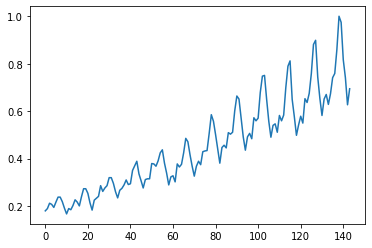

In [7]:
plt.plot(x_all)

In [30]:
train=x_all[0:100]
test=x_all[100:144]

In [31]:
m = 10
lst_inputs = []
# по размерности среза формируем инпуты
for i in range(train.shape[0]-m):
    lst_inputs.append(train[i:m+i])

x_train = np.array(lst_inputs) 
    
lst_test_inputs = []
# так же формируются тесты с срезами
for i in range(test.shape[0]-m):
    lst_test_inputs.append(test[i:m+i])
x_test = np.array(lst_test_inputs)

y_train=train[m:train.shape[0]]
y_test=test[m:test.shape[0]]

x_train.shape, x_test.shape

((90, 10), (34, 10))

In [32]:
import tensorflow as tf
from keras import layers

masking_layer = layers.Masking()
unmasked_embedding = tf.cast(
    tf.tile(tf.expand_dims(x_train, axis=1), [1, 1, 1]),
    tf.float32)

x_train_masked = masking_layer(unmasked_embedding)

masking_layer = layers.Masking()
unmasked_embedding = tf.cast(
    tf.tile(tf.expand_dims(x_test, axis=1), [1, 1, 1]),
    tf.float32)

x_test_masked = masking_layer(unmasked_embedding)

x_train_masked.shape

TensorShape([90, 1, 10])

In [33]:
#Модель

model=keras.Sequential(name="RNN")
model.add(layers.SimpleRNN(m, activation="tanh", input_dim=m))
model.add(layers.Dense(2*m+1, activation="sigmoid"))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "RNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 10)                210       
_________________________________________________________________
dense_8 (Dense)              (None, 21)                231       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 22        
Total params: 463
Trainable params: 463
Non-trainable params: 0
_________________________________________________________________


In [34]:
from keras import optimizers
from keras import losses
from keras import metrics

opt=optimizers.SGD(learning_rate=0.7)
f_loss=losses.MeanSquaredError()
met=metrics.Accuracy()

model.compile(
    optimizer=opt,
    loss=f_loss,
    metrics=met,
)

Epoch 1/300
90/90 [==============================] - 0s 4ms/step - loss: 0.0191 - accuracy: 0.0000e+00 - val_loss: 0.0846 - val_accuracy: 0.0000e+00
Epoch 2/300
90/90 [==============================] - 0s 2ms/step - loss: 0.0172 - accuracy: 0.0000e+00 - val_loss: 0.0741 - val_accuracy: 0.0000e+00
Epoch 3/300
90/90 [==============================] - 0s 2ms/step - loss: 0.0160 - accuracy: 0.0000e+00 - val_loss: 0.1109 - val_accuracy: 0.0000e+00
Epoch 4/300
90/90 [==============================] - 0s 2ms/step - loss: 0.0116 - accuracy: 0.0000e+00 - val_loss: 0.0178 - val_accuracy: 0.0000e+00
Epoch 5/300
90/90 [==============================] - 0s 2ms/step - loss: 0.0128 - accuracy: 0.0000e+00 - val_loss: 0.0548 - val_accuracy: 0.0000e+00
Epoch 6/300
90/90 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 0.0000e+00 - val_loss: 0.0583 - val_accuracy: 0.0000e+00
Epoch 7/300
90/90 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 0.0000e+00 - v

Epoch 56/300
90/90 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 0.0000e+00 - val_loss: 0.0070 - val_accuracy: 0.0000e+00
Epoch 57/300
90/90 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 0.0000e+00 - val_loss: 0.0069 - val_accuracy: 0.0000e+00
Epoch 58/300
90/90 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 0.0000e+00 - val_loss: 0.0106 - val_accuracy: 0.0000e+00
Epoch 59/300
90/90 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.0000e+00 - val_loss: 0.0075 - val_accuracy: 0.0000e+00
Epoch 60/300
90/90 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.0000e+00 - val_loss: 0.0127 - val_accuracy: 0.0000e+00
Epoch 61/300
90/90 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 0.0000e+00 - val_loss: 0.0073 - val_accuracy: 0.0000e+00
Epoch 62/300
90/90 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 0.0000e

90/90 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 0.0000e+00 - val_loss: 0.0110 - val_accuracy: 0.0000e+00
Epoch 111/300
90/90 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 0.0000e+00 - val_loss: 0.0069 - val_accuracy: 0.0000e+00
Epoch 112/300
90/90 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 0.0000e+00 - val_loss: 0.0069 - val_accuracy: 0.0000e+00
Epoch 113/300
90/90 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 0.0000e+00 - val_loss: 0.0061 - val_accuracy: 0.0000e+00
Epoch 114/300
90/90 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 0.0000e+00 - val_loss: 0.0068 - val_accuracy: 0.0000e+00
Epoch 115/300
90/90 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 0.0000e+00 - val_loss: 0.0074 - val_accuracy: 0.0000e+00
Epoch 116/300
90/90 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 0.0000e+00 - v

90/90 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 0.0000e+00 - val_loss: 0.0117 - val_accuracy: 0.0000e+00
Epoch 165/300
90/90 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 0.0000e+00 - val_loss: 0.0082 - val_accuracy: 0.0000e+00
Epoch 166/300
90/90 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 0.0000e+00 - val_loss: 0.0086 - val_accuracy: 0.0000e+00
Epoch 167/300
90/90 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 0.0000e+00 - val_loss: 0.0089 - val_accuracy: 0.0000e+00
Epoch 168/300
90/90 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 0.0000e+00 - val_loss: 0.0103 - val_accuracy: 0.0000e+00
Epoch 169/300
90/90 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 0.0000e+00 - val_loss: 0.0114 - val_accuracy: 0.0000e+00
Epoch 170/300
90/90 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 0.0000e+00 - v

90/90 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 0.0000e+00 - val_loss: 0.0058 - val_accuracy: 0.0000e+00
Epoch 219/300
90/90 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 0.0000e+00 - val_loss: 0.0095 - val_accuracy: 0.0000e+00
Epoch 220/300
90/90 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 0.0000e+00 - val_loss: 0.0088 - val_accuracy: 0.0000e+00
Epoch 221/300
90/90 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 0.0000e+00 - val_loss: 0.0121 - val_accuracy: 0.0000e+00
Epoch 222/300
90/90 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.0000e+00 - val_loss: 0.0058 - val_accuracy: 0.0000e+00
Epoch 223/300
90/90 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 0.0000e+00 - val_loss: 0.0063 - val_accuracy: 0.0000e+00
Epoch 224/300
90/90 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 0.0000e+00 - v

90/90 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 0.0000e+00 - val_loss: 0.0059 - val_accuracy: 0.0000e+00
Epoch 273/300
90/90 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 0.0000e+00 - val_loss: 0.0114 - val_accuracy: 0.0000e+00
Epoch 274/300
90/90 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.0000e+00 - val_loss: 0.0070 - val_accuracy: 0.0000e+00
Epoch 275/300
90/90 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.0000e+00 - val_loss: 0.0070 - val_accuracy: 0.0000e+00
Epoch 276/300
90/90 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 0.0000e+00 - val_loss: 0.0081 - val_accuracy: 0.0000e+00
Epoch 277/300
90/90 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.0000e+00 - val_loss: 0.0072 - val_accuracy: 0.0000e+00
Epoch 278/300
90/90 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.0000e+00 - v

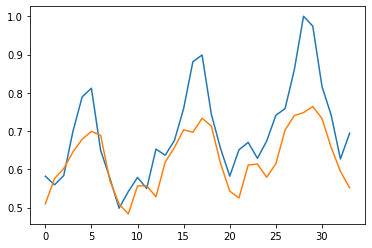

In [35]:
#Обучение

ep=300

model.fit(
    x=x_train_masked,
    y=y_train,
    batch_size=1,
    epochs=ep,
    validation_data=(x_test_masked,y_test),
)

y=model.predict(x_test_masked)

plt.plot(y_test)
plt.plot(y)

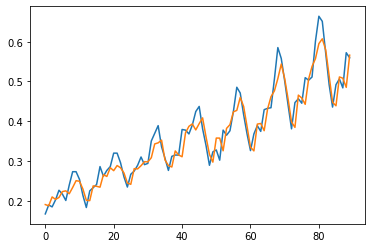

In [36]:
y=model.predict(x_all_masked)

plt.plot(y_train)
plt.plot(y)

## Задача 2. Прогнозирование уровня воды в Венеции

источник данных: https://www.kaggle.com/lbronchal/venezia

In [38]:
data=pd.read_csv("venezia_mean.csv", delimiter=";")
data

,Index,Date,Value
0,0,1983-01-01 01:00:00,6.333333
1,1,1983-01-02 01:00:00,8.208333
2,2,1983-01-03 01:00:00,6.458333
3,3,1983-01-04 01:00:00,7.666667
4,4,1983-01-05 01:00:00,7.958333
...,...,...,...
12048,12048,2015-12-27 01:00:00,7.291667
12049,12049,2015-12-28 01:00:00,4.541667
12050,12050,2015-12-29 01:00:00,3.625000
12051,12051,2015-12-30 01:00:00,12.250000


In [42]:
x_all=data["Value"].values
x_all=x_all/max(x_all)
max(x_all)

-0.2579349136199277

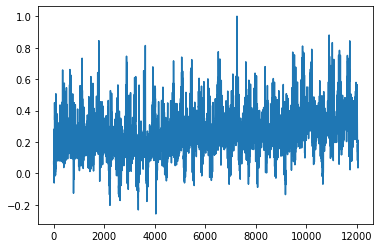

In [45]:
plt.plot(x_all)

In [46]:
train=x_all[:10000]
test=x_all[10000:]

In [47]:
m = 10
lst_inputs = []
# по размерности среза формируем инпуты
for i in range(train.shape[0]-m):
    lst_inputs.append(train[i:m+i])

x_train = np.array(lst_inputs) 
    
lst_test_inputs = []
# так же формируются тесты с срезами
for i in range(test.shape[0]-m):
    lst_test_inputs.append(test[i:m+i])
x_test = np.array(lst_test_inputs)

y_train=train[m:train.shape[0]]
y_test=test[m:test.shape[0]]

x_train.shape, x_test.shape

((9990, 10), (2043, 10))

In [48]:
import tensorflow as tf

masking_layer = layers.Masking()
unmasked_embedding = tf.cast(
    tf.tile(tf.expand_dims(x_train, axis=1), [1, 1, 1]),
    tf.float32)

x_train_masked = masking_layer(unmasked_embedding)

masking_layer = layers.Masking()
unmasked_embedding = tf.cast(
    tf.tile(tf.expand_dims(x_test, axis=1), [1, 1, 1]),
    tf.float32)

x_test_masked = masking_layer(unmasked_embedding)

x_train_masked.shape

TensorShape([9990, 1, 10])

In [104]:
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation
from keras import backend as K

def arelu(x):
    return K.relu(x)*2

get_custom_objects().update({'custom_activation': Activation(custom_activation)})

In [111]:
#Модель

model=keras.Sequential(name="RNN")
model.add(layers.SimpleRNN(m, activation="tanh", input_dim=m))
model.add(layers.Dense(2*m+1, activation=arelu))
model.add(layers.Dense(1, activation=tf.nn.leaky_relu))

model.summary()

Model: "RNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_24 (SimpleRNN)    (None, 10)                210       
_________________________________________________________________
dense_38 (Dense)             (None, 21)                231       
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 22        
Total params: 463
Trainable params: 463
Non-trainable params: 0
_________________________________________________________________


In [112]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(
    optimizer=optimizers.SGD(learning_rate=0.7),
    loss=losses.MeanSquaredError(),
    metrics=metrics.Accuracy(),
)

Epoch 1/30
999/999 [==============================] - 2s 2ms/step - loss: 0.0192 - accuracy: 0.0000e+00 - val_loss: 0.0094 - val_accuracy: 0.0000e+00
Epoch 2/30
999/999 [==============================] - 1s 1ms/step - loss: 0.0129 - accuracy: 0.0000e+00 - val_loss: 0.0149 - val_accuracy: 0.0000e+00
Epoch 3/30
999/999 [==============================] - 1s 1ms/step - loss: 0.0108 - accuracy: 0.0000e+00 - val_loss: 0.0149 - val_accuracy: 0.0000e+00
Epoch 4/30
999/999 [==============================] - 1s 1ms/step - loss: 0.0119 - accuracy: 0.0000e+00 - val_loss: 0.0075 - val_accuracy: 0.0000e+00
Epoch 5/30
999/999 [==============================] - 1s 1ms/step - loss: 0.0069 - accuracy: 0.0000e+00 - val_loss: 0.0108 - val_accuracy: 0.0000e+00
Epoch 6/30
999/999 [==============================] - 1s 1ms/step - loss: 0.0063 - accuracy: 0.0000e+00 - val_loss: 0.0093 - val_accuracy: 0.0000e+00
Epoch 7/30
999/999 [==============================] - 1s 1ms/step - loss: 0.0063 - accuracy: 0.0000e

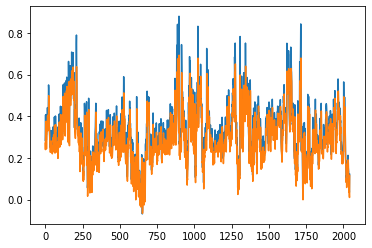

In [113]:
#Обучение

ep=30

model.fit(
    x=x_train_masked,
    y=y_train,
    batch_size=10,
    epochs=ep,
    validation_data=(x_test_masked,y_test),
)

y=model.predict(x_test_masked)

plt.plot(y_test)
plt.plot(y)

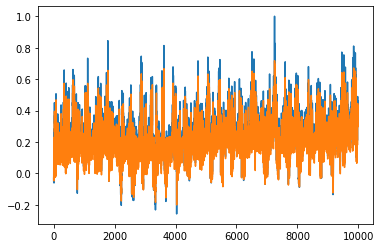

In [114]:
y=model.predict(x_train_masked)

plt.plot(y_train)
plt.plot(y)

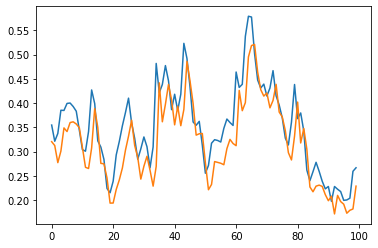

In [116]:
y=model.predict(x_test_masked)

plt.plot(y_test[1900:2000])
plt.plot(y[1900:2000])

In [117]:
model.evaluate(x_test_masked)

64/64 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]